In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

#Make Dataset

In [2]:
dataset_dir = "Data"
classes = [chr(ord('A') + i) for i in range(6)]
num_classes = len(classes)
print(num_classes)

6


In [3]:
classes

['A', 'B', 'C', 'D', 'E', 'F']

In [4]:
X = []  # Images
y = []  # Labels

for class_idx, class_name in enumerate(classes, start=1):
    class_folder = os.path.join(dataset_dir, class_name)
    for image_filename in os.listdir(class_folder):
        if image_filename.endswith(".jpg"):
            image_path = os.path.join(class_folder, image_filename)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (300, 300))
            X.append(resized_image)
            y.append(class_idx)


In [5]:
X = np.array(X)
y = np.array(y)

In [6]:
X.shape

(2394, 300, 300, 3)

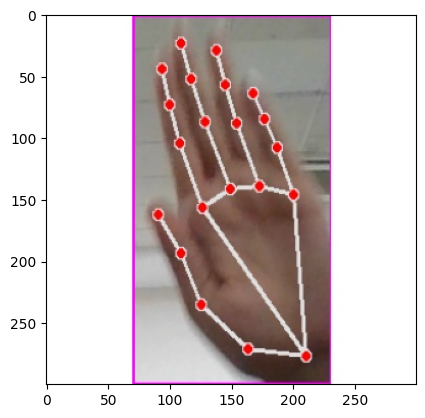

In [7]:
single = X[0]
single = cv2.cvtColor(single,cv2.COLOR_BGR2RGB)
plt.imshow(single)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

#Preprocessing

In [9]:
X_train.shape

(1915, 300, 300, 3)

In [10]:
y_train

array([4, 2, 4, ..., 1, 2, 5])

In [11]:
X_train.max()

255

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(1915,)

In [15]:
len(y_train)

1915

In [16]:
y_train = y_train.reshape(len(y_train),1)

In [17]:
y_train.shape

(1915, 1)

In [18]:
y_train

array([[4],
       [2],
       [4],
       ...,
       [1],
       [2],
       [5]])

In [19]:
y_cat_train = to_categorical(y_train-1,6)

In [20]:
y_train[100]

array([5])

In [21]:
y_cat_train[100]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test-1,6)

#MODEL

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten ,Dropout

In [24]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(4,4),input_shape=(300,300, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(6, activation='softmax'))


In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 145, 145, 64)      131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 72, 72, 64)        0         
                                                                 
 flatten (Flatten)           (None, 331776)            0

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

##Train THe model

In [29]:
model.fit(X_train,y_cat_train,epochs=100,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/100
60/60 [==============================] - 51s 613ms/step - loss: 10.0944 - accuracy: 0.4742 - val_loss: 0.4404 - val_accuracy: 0.8914
Epoch 2/100
60/60 [==============================] - 26s 435ms/step - loss: 0.7971 - accuracy: 0.8423 - val_loss: 0.2209 - val_accuracy: 0.9332
Epoch 3/100
60/60 [==============================] - 26s 433ms/step - loss: 0.0929 - accuracy: 0.9718 - val_loss: 0.3893 - val_accuracy: 0.9144
Epoch 4/100
60/60 [==============================] - 27s 444ms/step - loss: 0.0900 - accuracy: 0.9775 - val_loss: 0.2847 - val_accuracy: 0.9374
Epoch 5/100
60/60 [==============================] - 26s 434ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.4886 - val_accuracy: 0.9269
Epoch 6/100
60/60 [==============================] - 27s 443ms/step - loss: 0.1171 - accuracy: 0.9765 - val_loss: 0.2730 - val_accuracy: 0.9457
Epoch 7/100
60/60 [==============================] - 26s 437ms/step - loss: 0.0052 - accuracy: 0.9979 - val_loss: 0.2337 - val_accuracy

##Save the Model

In [30]:
model.save('hand_det.h5')

#Visualise Results

In [31]:
losses = pd.DataFrame(model.history.history)

<Axes: >

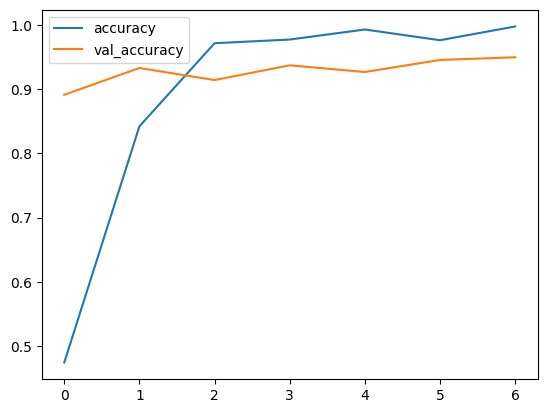

In [32]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

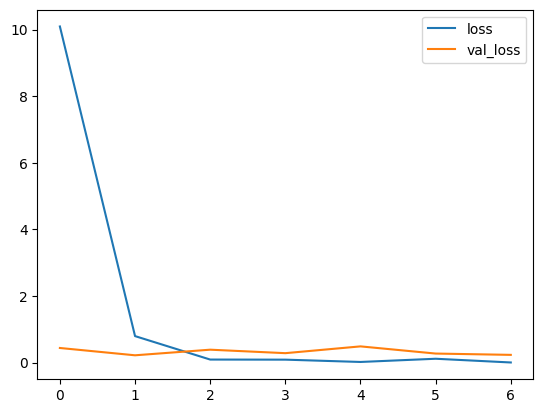

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)

15/15 [==============================] - 1s 59ms/step


In [35]:
y_pred =  np.argmax(predictions,axis=1) +1
y_pred

array([3, 2, 6, 1, 3, 4, 1, 6, 4, 3, 2, 3, 5, 2, 1, 2, 4, 6, 1, 2, 1, 3,
       1, 4, 6, 1, 3, 5, 6, 6, 6, 6, 3, 6, 6, 4, 5, 3, 6, 2, 6, 3, 3, 3,
       3, 6, 3, 2, 5, 1, 6, 6, 1, 1, 4, 5, 3, 2, 4, 5, 2, 4, 1, 4, 5, 5,
       5, 1, 1, 3, 4, 4, 1, 6, 6, 2, 5, 3, 5, 2, 1, 5, 2, 4, 3, 2, 3, 5,
       6, 3, 6, 5, 1, 6, 3, 2, 5, 1, 6, 3, 2, 1, 2, 2, 2, 3, 1, 4, 5, 6,
       1, 6, 5, 5, 1, 6, 2, 1, 2, 3, 6, 6, 1, 2, 4, 3, 6, 2, 3, 4, 1, 5,
       2, 5, 5, 5, 2, 4, 2, 6, 6, 5, 6, 3, 6, 1, 2, 5, 5, 6, 2, 3, 2, 4,
       6, 6, 2, 3, 6, 4, 6, 1, 4, 4, 4, 6, 6, 6, 4, 1, 4, 1, 4, 2, 1, 6,
       2, 1, 4, 1, 2, 5, 6, 1, 3, 6, 3, 5, 5, 5, 3, 2, 5, 3, 5, 2, 5, 4,
       4, 6, 4, 4, 4, 1, 3, 4, 2, 6, 4, 6, 2, 2, 4, 3, 3, 4, 1, 2, 3, 2,
       1, 6, 2, 1, 3, 3, 6, 4, 1, 5, 6, 1, 3, 6, 1, 2, 5, 2, 2, 2, 3, 2,
       4, 2, 4, 2, 4, 3, 3, 2, 4, 2, 2, 5, 4, 5, 5, 5, 6, 1, 5, 3, 4, 2,
       1, 2, 5, 2, 1, 4, 6, 1, 1, 2, 6, 6, 5, 2, 2, 1, 3, 6, 1, 2, 1, 2,
       4, 6, 2, 5, 4, 4, 5, 2, 1, 2, 5, 6, 6, 5, 3,

In [36]:
y_true = np.argmax(y_cat_test,axis=1) + 1

In [37]:
y_true.shape

(479,)

In [38]:
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

           A       0.94      0.92      0.93        71
           B       0.95      0.98      0.96        96
           C       0.96      0.94      0.95        71
           D       0.95      0.97      0.96        76
           E       1.00      0.97      0.99        73
           F       0.91      0.91      0.91        92

    accuracy                           0.95       479
   macro avg       0.95      0.95      0.95       479
weighted avg       0.95      0.95      0.95       479



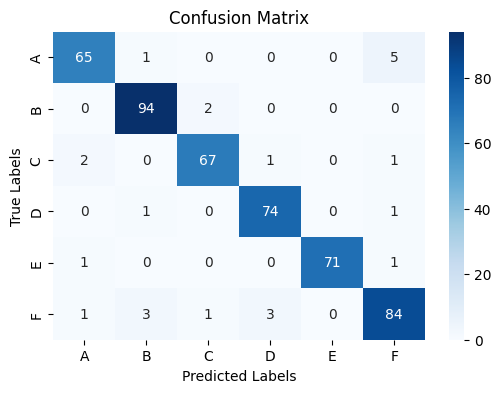

In [39]:
import seaborn as sns

confusion = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Predictions

In [40]:
my_image = X_test[16]
my_image.shape

(300, 300, 3)

In [41]:
np.argmax(y_cat_test[16]) + 1

4

In [42]:
y_true = model.predict(my_image.reshape(1,300,300,3))
y_cat = np.argmax(y_true) + 1

1/1 [==============================] - 0s 140ms/step


In [43]:
y_cat

4